In [1]:
install.packages("lmtest")

Installing package into ‘/Users/vghavate3103/Library/R/x86_64/4.3/library’
(as ‘lib’ is unspecified)




The downloaded binary packages are in
	/var/folders/y2/fnsdz4g524qdcz1g6c2jbtmw0000gq/T//RtmpLUKL5J/downloaded_packages


In [2]:
library(stringr)
library(xts)
library(tseries)
library(TSA)
library(lmtest)

set.seed(121)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘TSA’


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar




,X,State.Code,County.Code,Site.Num,Address,State,County,City,Date.Local,NO2.Units,⋯,SO2.Units,SO2.Mean,SO2.1st.Max.Value,SO2.1st.Max.Hour,SO2.AQI,CO.Units,CO.Mean,CO.1st.Max.Value,CO.1st.Max.Hour,CO.AQI
,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>,<int>,<int>
1,13355,6,37,4002,"3648 N. LONG BEACH BLVD., LONG BEACH",California,Los Angeles,Long Beach,1/1/2000,Parts per billion,⋯,Parts per billion,0.739130,3,21,4,Parts per million,0.811111,2.0,6,23
2,13359,6,37,4002,"3648 N. LONG BEACH BLVD., LONG BEACH",California,Los Angeles,Long Beach,1/2/2000,Parts per billion,⋯,Parts per billion,0.391304,2,15,3,Parts per million,0.237500,0.6,3,7
3,13363,6,37,4002,"3648 N. LONG BEACH BLVD., LONG BEACH",California,Los Angeles,Long Beach,1/3/2000,Parts per billion,⋯,Parts per billion,1.652174,4,14,6,Parts per million,1.500000,2.3,10,26
4,13367,6,37,4002,"3648 N. LONG BEACH BLVD., LONG BEACH",California,Los Angeles,Long Beach,1/4/2000,Parts per billion,⋯,Parts per billion,1.521739,4,8,6,Parts per million,1.916667,2.9,4,33
5,13371,6,37,4002,"3648 N. LONG BEACH BLVD., LONG BEACH",California,Los Angeles,Long Beach,1/5/2000,Parts per billion,⋯,Parts per billion,4.173913,27,13,39,Parts per million,2.487500,3.9,8,44
6,13375,6,37,4002,"3648 N. LONG BEACH BLVD., LONG BEACH",California,Los Angeles,Long Beach,1/6/2000,Parts per billion,⋯,Parts per billion,3.913043,11,12,16,Parts per million,1.325000,2.7,10,31


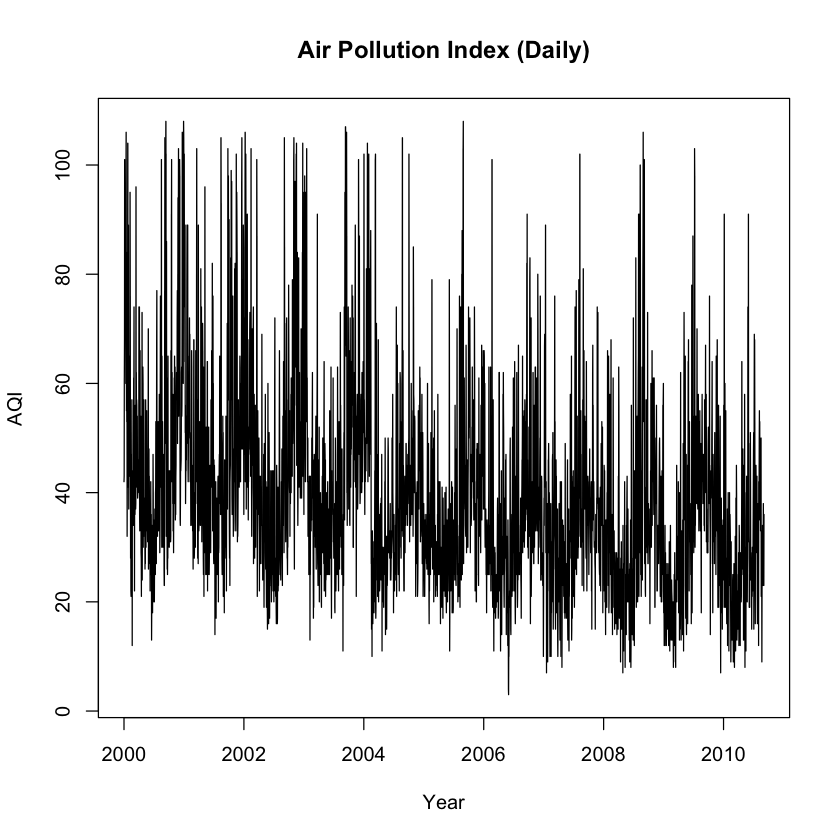

In [3]:
#----------daily data-------------

data = read.csv('LA_pollution.csv')
head(data)


datats=ts(data[14],start=c(2000,1,1), frequency=365.25)
plot(datats, xlab = 'Year', ylab = 'AQI', main = 'Air Pollution Index (Daily)')

,WEEK
,<dbl>
1,67.00000
2,81.42857
3,57.42857
4,63.28571
5,52.14286
6,52.57143


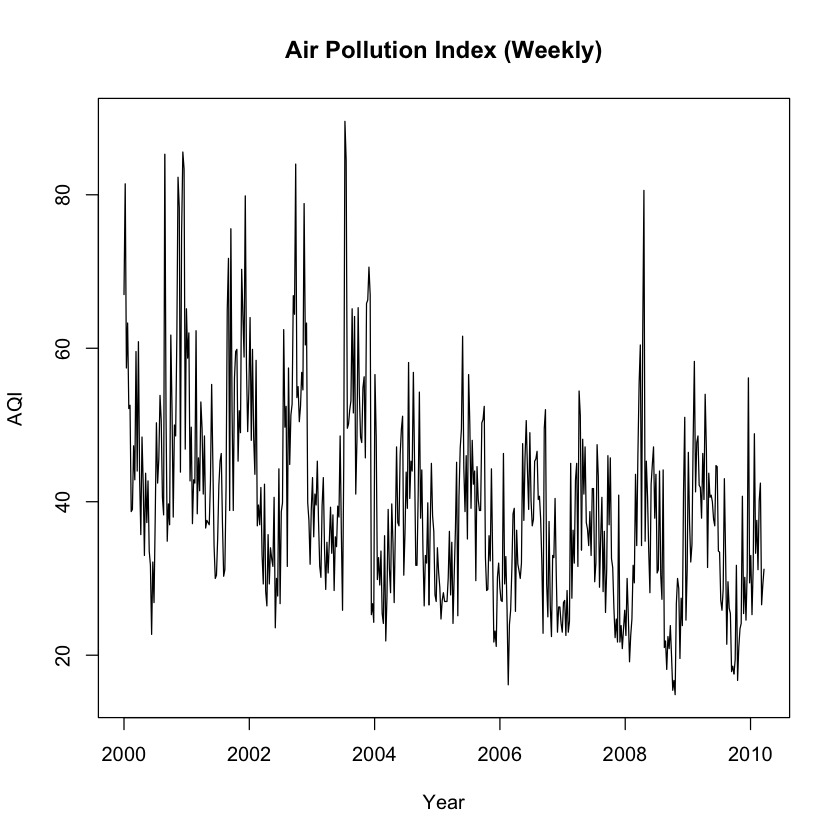

In [4]:
#----------weekly data-------------

dataw = read.csv('pollution_week.csv')

head(dataw)

datats=ts(dataw,start=c(2000,1,1), frequency=365.25/7)
plot(datats, xlab = 'Year', ylab = 'AQI', main = 'Air Pollution Index (Weekly)')

,X,X0,X1,X2
,<int>,<chr>,<dbl>,<int>
1,0,2/2000,64.74194,31
2,1,3/2000,44.75000,28
3,2,4/2000,47.00000,30
4,3,5/2000,45.20690,29
5,4,6/2000,39.06667,30
6,5,7/2000,30.31034,29


Warning message in adf.test(datamts):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  datamts
Dickey-Fuller = -7.7102, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


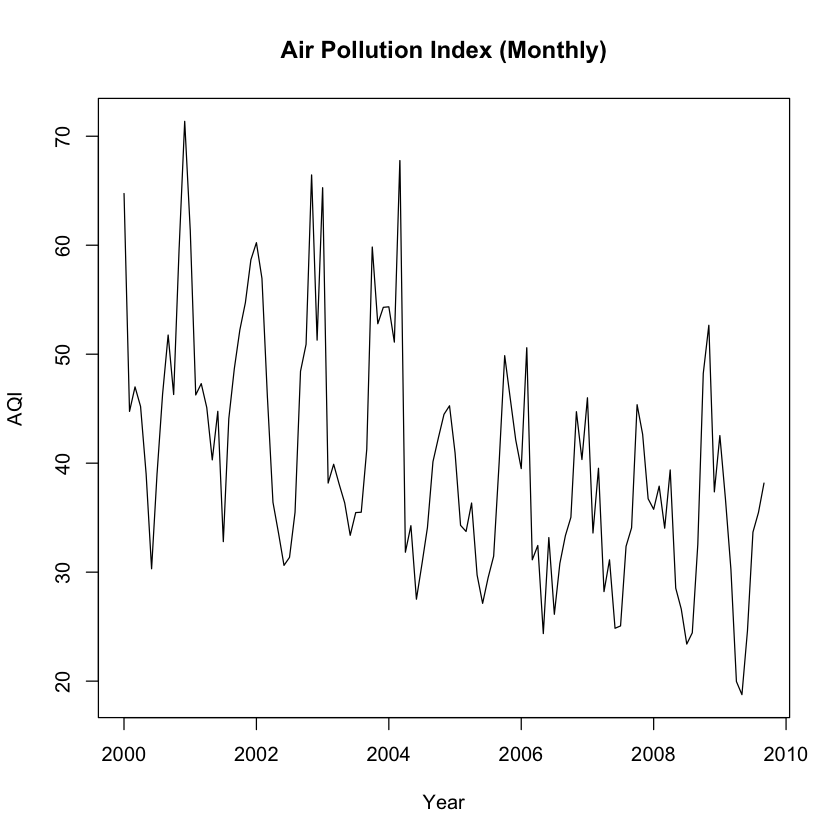

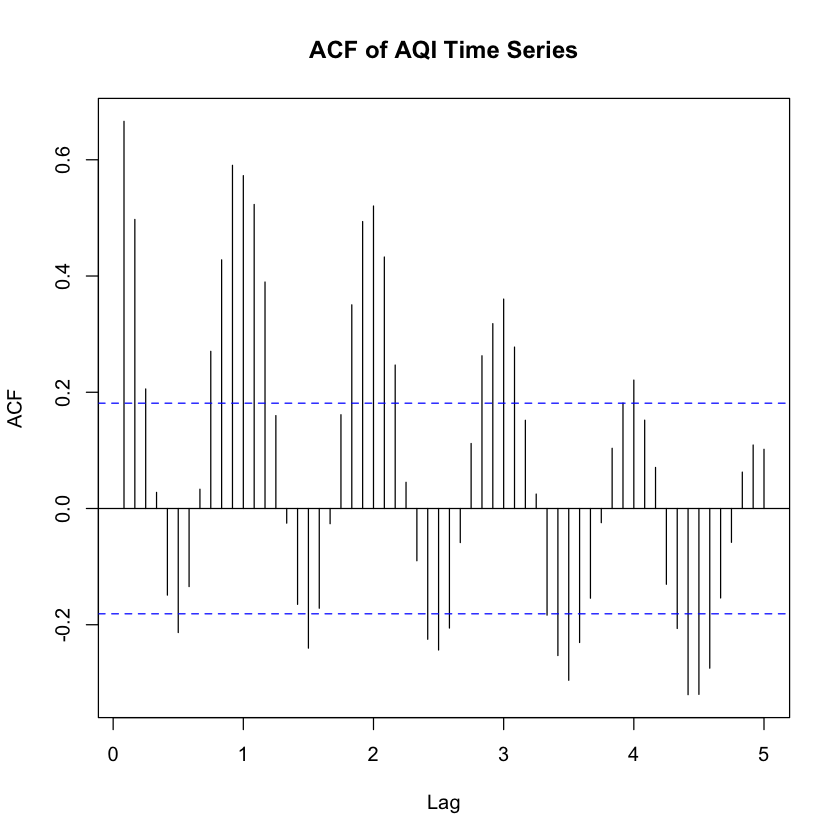

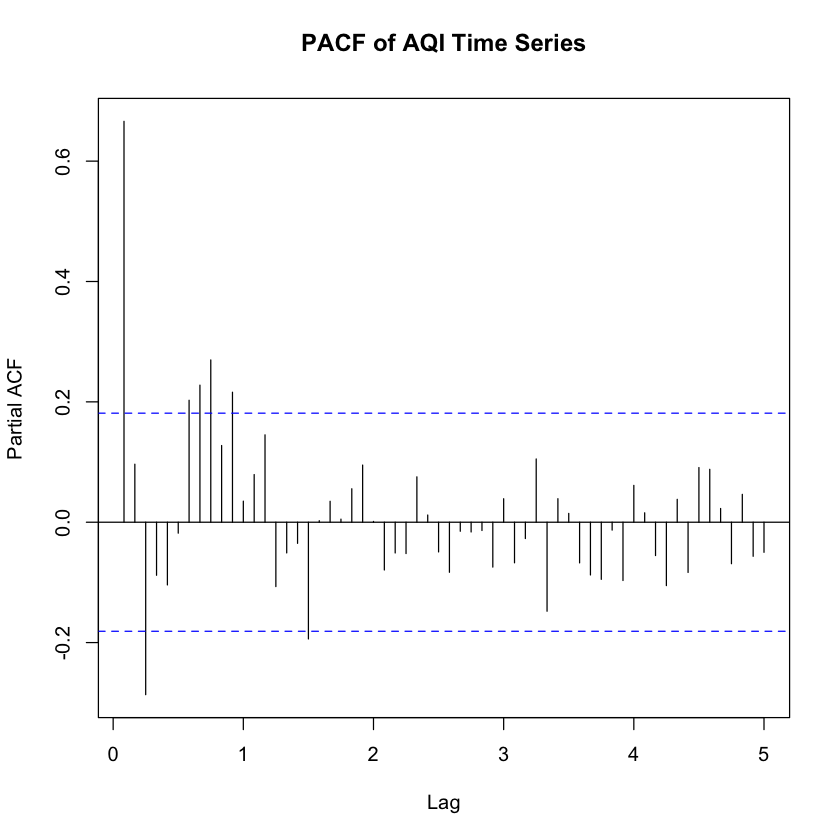

In [5]:
#----------monthly-----------------

datam = read.csv('pollution_monthly.csv')

head(datam)

datamts=ts(datam$X1[1:117],start=c(2000,1), frequency=12)
datamts.new=ts(datam$X1[118:131],start=c(2010,1), frequency=12)
plot(datamts, xlab = 'Year', ylab = 'AQI', main = 'Air Pollution Index (Monthly)')

adf.test(datamts)
#time series is stationary

acf(datamts,lag.max=60,main="ACF of AQI Time Series")
# Period 3 with MA

pacf(datamts,lag.max=60,main="PACF of AQI Time Series")
#peroid 3 with AR

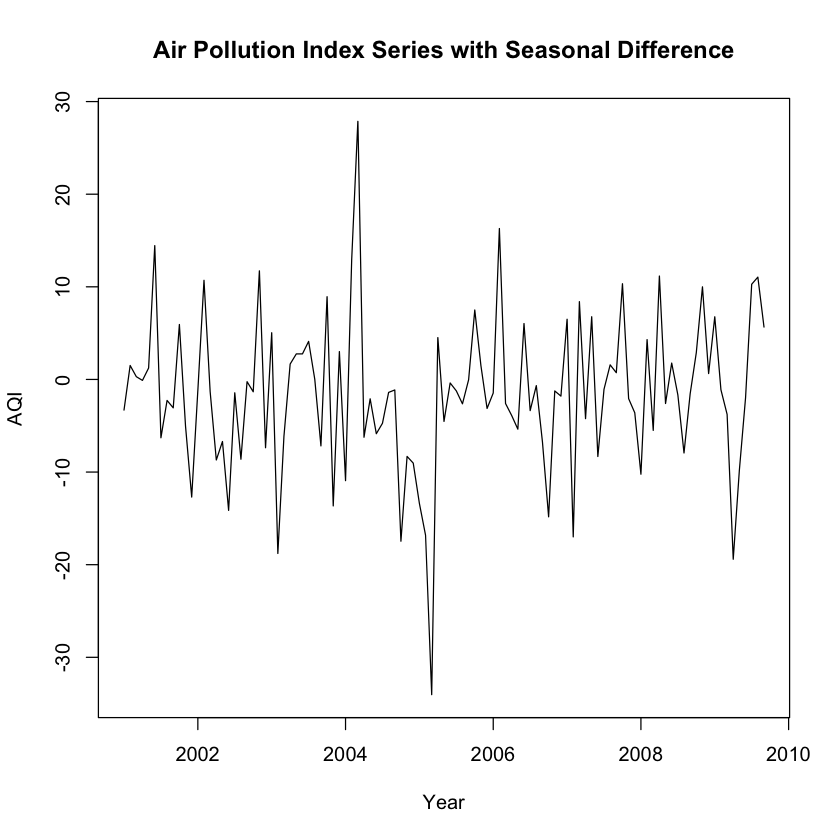

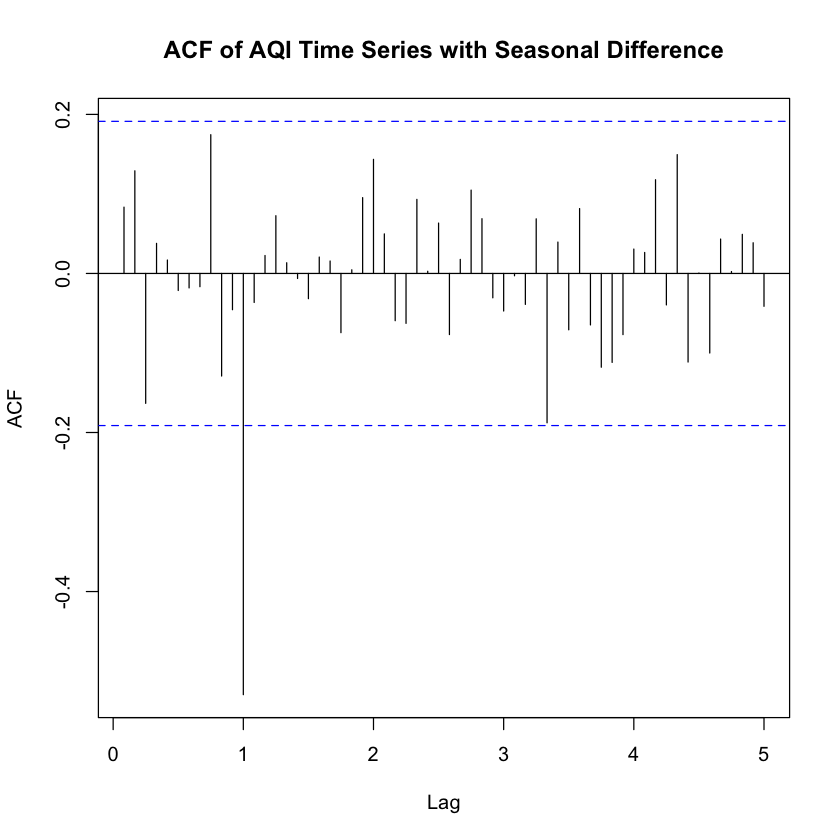


Call:
arima(x = datamts, order = c(0, 0, 0), seasonal = list(order = c(1, 1, 1), period = 12), 
    xreg = 1:n)

Coefficients:
         sar1     sma1     xreg
      -0.2389  -0.6834  -0.1606
s.e.   0.1336   0.1424   0.0186

sigma^2 estimated as 39.2:  log likelihood = -347.53,  aic = 701.07


z test of coefficients:

      Estimate Std. Error z value  Pr(>|z|)    
sar1 -0.238901   0.133602 -1.7882   0.07375 .  
sma1 -0.683435   0.142371 -4.8004 1.584e-06 ***
xreg -0.160567   0.018602 -8.6319 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



Call:
arima(x = datamts, order = c(0, 0, 0), seasonal = list(order = c(0, 1, 1), period = 12), 
    xreg = 1:n)

Coefficients:
         sma1     xreg
      -0.8530  -0.1591
s.e.   0.1511   0.0177

sigma^2 estimated as 39.07:  log likelihood = -348.94,  aic = 701.88


z test of coefficients:

      Estimate Std. Error z value  Pr(>|z|)    
sma1 -0.853039   0.151058 -5.6471 1.632e-08 ***
xreg -0.159149   0.017721 -8.9808 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



Call:
arima(x = datamts, order = c(0, 0, 0), seasonal = list(order = c(1, 1, 0), period = 12), 
    xreg = 1:n)

Coefficients:
         sar1     xreg
      -0.5772  -0.1454
s.e.   0.0785   0.0373

sigma^2 estimated as 47.8:  log likelihood = -354.43,  aic = 712.87


z test of coefficients:

      Estimate Std. Error z value  Pr(>|z|)    
sar1 -0.577242   0.078467 -7.3565 1.888e-13 ***
xreg -0.145408   0.037258 -3.9027 9.511e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


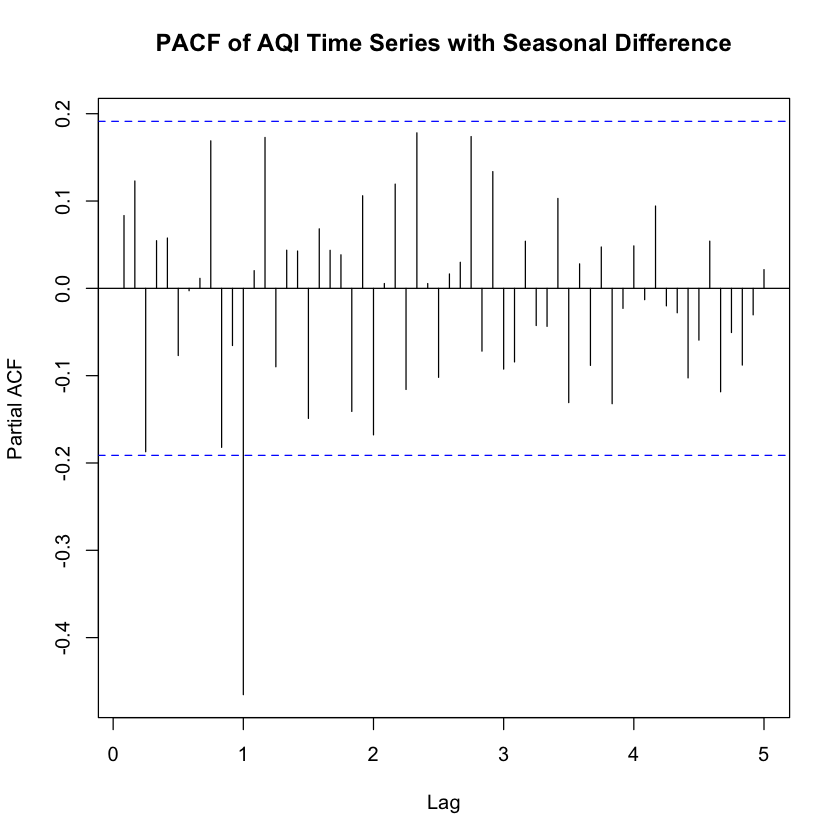

In [6]:
# obvuois seasonality at period 12
sd_datamts=diff(datamts,12)
plot(sd_datamts,xlab = 'Year', ylab = 'AQI', main = 'Air Pollution Index Series with Seasonal Difference')

acf(sd_datamts,lag.max=60,main="ACF of AQI Time Series with Seasonal Difference")
pacf(sd_datamts,lag.max=60,main="PACF of AQI Time Series with Seasonal Difference")

n=length(datamts)

out = arima(datamts,c(0,0,0),xreg =1:n,seasonal = list(order = c(1, 1, 1), period = 12))
out
coeftest(out)

out1 = arima(datamts,c(0,0,0),xreg =1:n,seasonal = list(order = c(0, 1, 1), period = 12))
out1
coeftest(out1)

out2 = arima(datamts,c(0,0,0),xreg =1:n,seasonal = list(order = c(1, 1, 0), period = 12))
out2
coeftest(out2)


	Box-Ljung test

data:  out$residuals
X-squared = 60.075, df = 60, p-value = 0.473


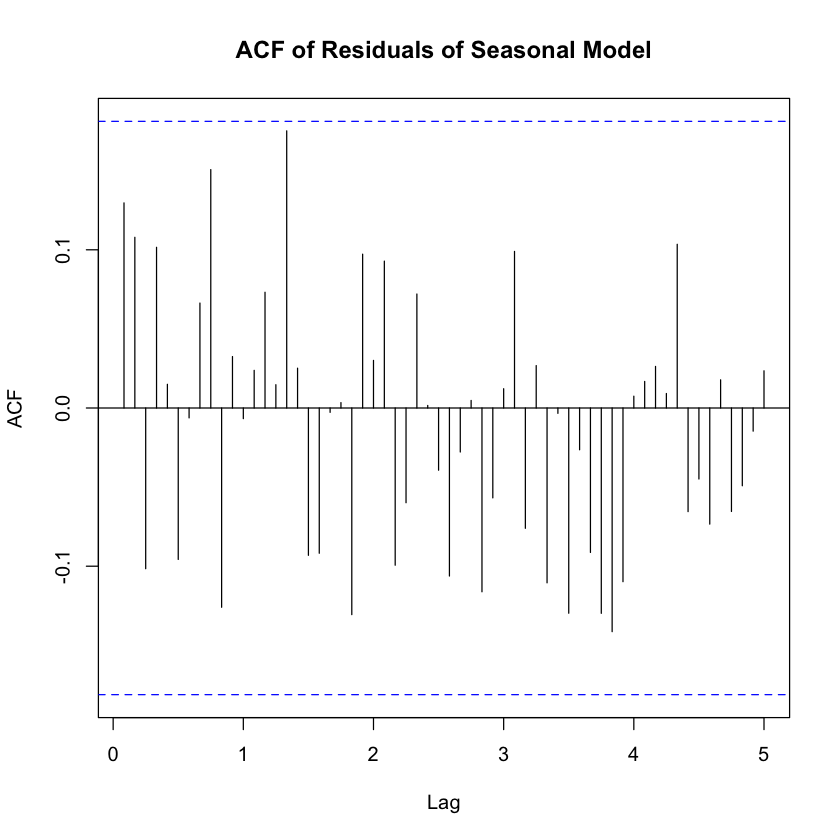

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 o o o o o o o o o o o  o  o  o 
1 x o o o o o o o o o o  o  o  o 
2 x o o o o o o o o o o  o  o  o 
3 x o x o o o o o o o o  o  o  o 
4 o x o x o o o o o o o  o  o  o 
5 o x x o o o o o o o o  o  o  o 
6 x x o o o o o o o o o  o  o  o 
7 x o x x o x x o o o o  o  o  o 



Call:
arima(x = datamts, order = c(0, 0, 0), seasonal = list(order = c(1, 1, 1), period = 12), 
    xreg = 1:n)

Coefficients:
         sar1     sma1     xreg
      -0.2389  -0.6834  -0.1606
s.e.   0.1336   0.1424   0.0186

sigma^2 estimated as 39.2:  log likelihood = -347.53,  aic = 701.07


z test of coefficients:

      Estimate Std. Error z value  Pr(>|z|)    
sar1 -0.238901   0.133602 -1.7882   0.07375 .  
sma1 -0.683435   0.142371 -4.8004 1.584e-06 ***
xreg -0.160567   0.018602 -8.6319 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


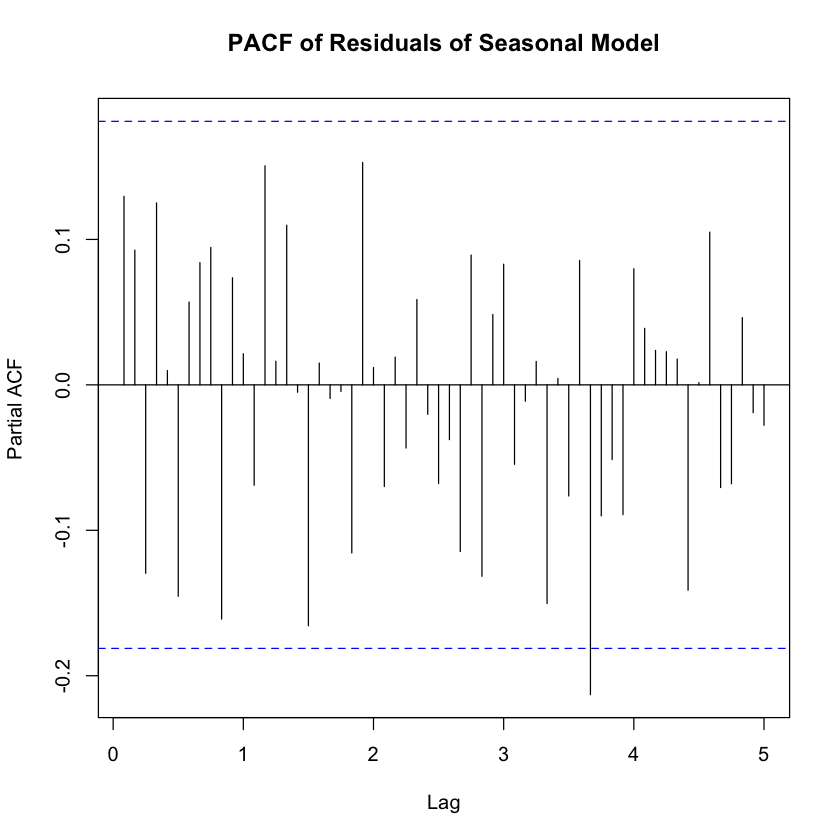

In [7]:
Box.test(out$residuals, type = 'Ljung',lag = 60)

acf(out$residuals,lag.max=60,main="ACF of Residuals of Seasonal Model")
pacf(out$residuals,lag.max=60,main="PACF of Residuals of Seasonal Model")
eacf(out$residuals)


outf = arima(datamts,c(0,0,0),xreg =1:n,seasonal = list(order = c(1, 1, 1), period = 12))
outf
coeftest(outf)

[1]  508.4677  928.0959 1654.7196

[1] 442.3467 608.8098 702.1367


Call:
arima(x = datamts, order = c(1, 0, 1), seasonal = list(order = c(1, 1, 1), period = 12), 
    xreg = 1:n)

Coefficients:
         ar1      ma1     sar1     sma1     xreg
      0.4966  -0.3627  -0.2387  -0.7021  -0.1596
s.e.  0.4517   0.4793   0.1305   0.1387   0.0225

sigma^2 estimated as 38.07:  log likelihood = -346.35,  aic = 702.7


z test of coefficients:

      Estimate Std. Error z value  Pr(>|z|)    
ar1   0.496597   0.451720  1.0993   0.27162    
ma1  -0.362687   0.479341 -0.7566   0.44927    
sar1 -0.238723   0.130539 -1.8287   0.06744 .  
sma1 -0.702092   0.138716 -5.0614 4.163e-07 ***
xreg -0.159566   0.022535 -7.0807 1.435e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1]  509.0062  928.0828 1654.9629

[1] 555.8309 810.7495 981.4912


	Box-Ljung test

data:  outf$residuals
X-squared = 60.075, df = 60, p-value = 0.473


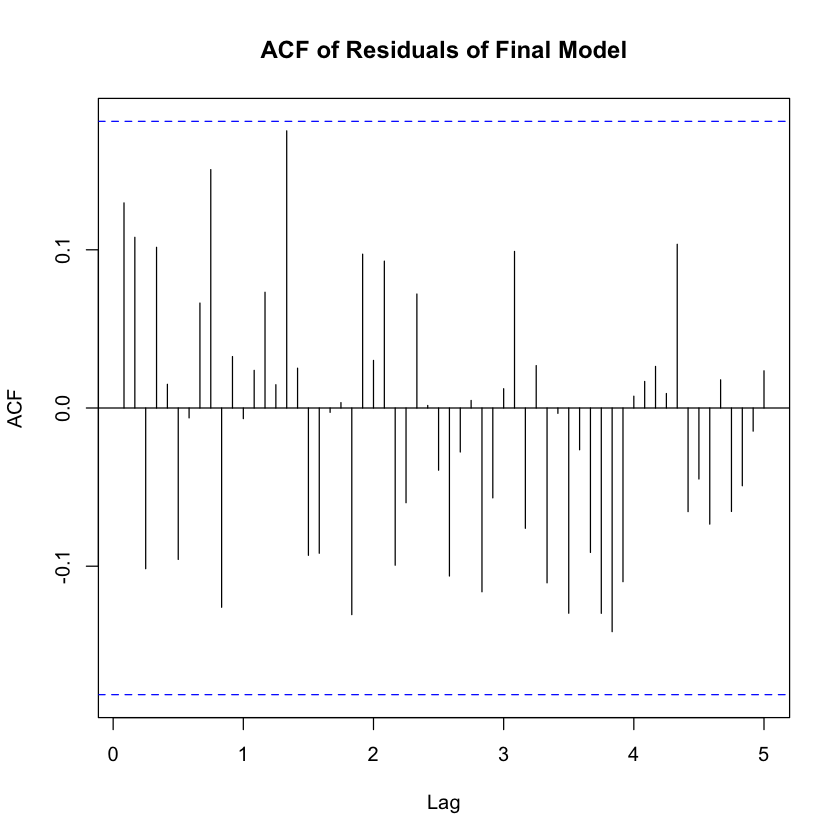

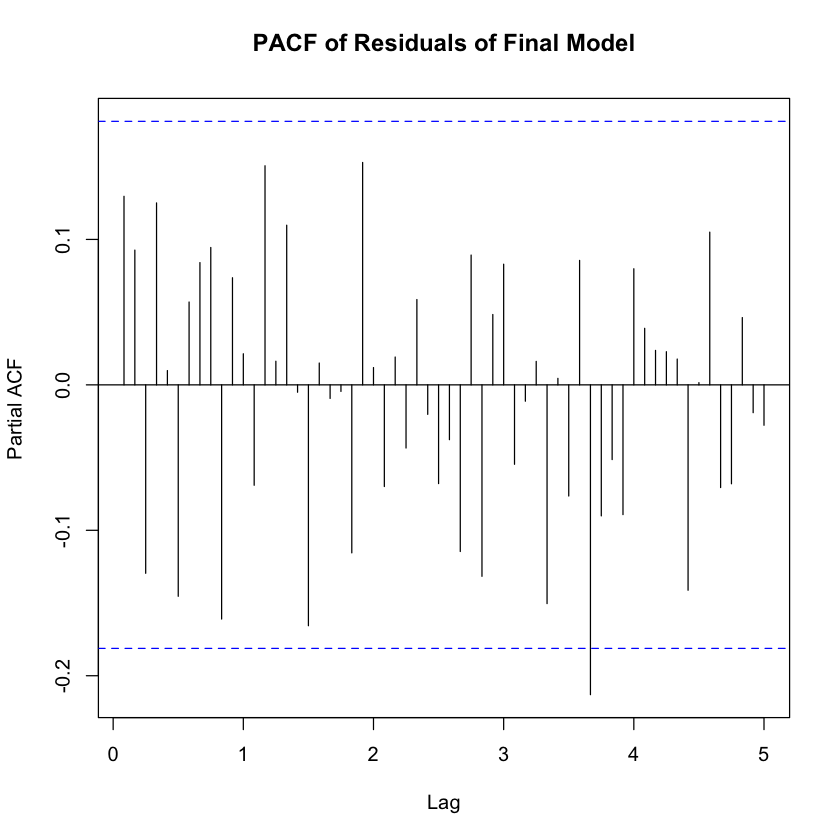

In [8]:
source("rolling.forecast.R")

rolling.forecast(datamts, 3, length(datamts)-10, c(0,0,0),seasonal = list(order = c(1, 1, 1)))
rolling.forecast(sd_datamts, 3, length(sd_datamts)-10, c(0,0,0),seasonal = list(order = c(1, 1, 1)))


outf1 = arima(datamts,c(1,0,1),xreg =1:n,seasonal = list(order = c(1, 1, 1), period = 12))
outf1
coeftest(outf1)
rolling.forecast(datamts, 3, length(datamts)-10,c(1,0,1),seasonal = list(order = c(1, 1, 1)))
rolling.forecast(sd_datamts, 3, length(sd_datamts)-10,c(1,0,1),seasonal = list(order = c(1, 1, 1)))


Box.test(outf$residuals, type = 'Ljung',lag = 60)

acf(outf$residuals,lag.max=60,main = "ACF of Residuals of Final Model")
pacf(outf$residuals,lag.max=60, main = "PACF of Residuals of Final Model")

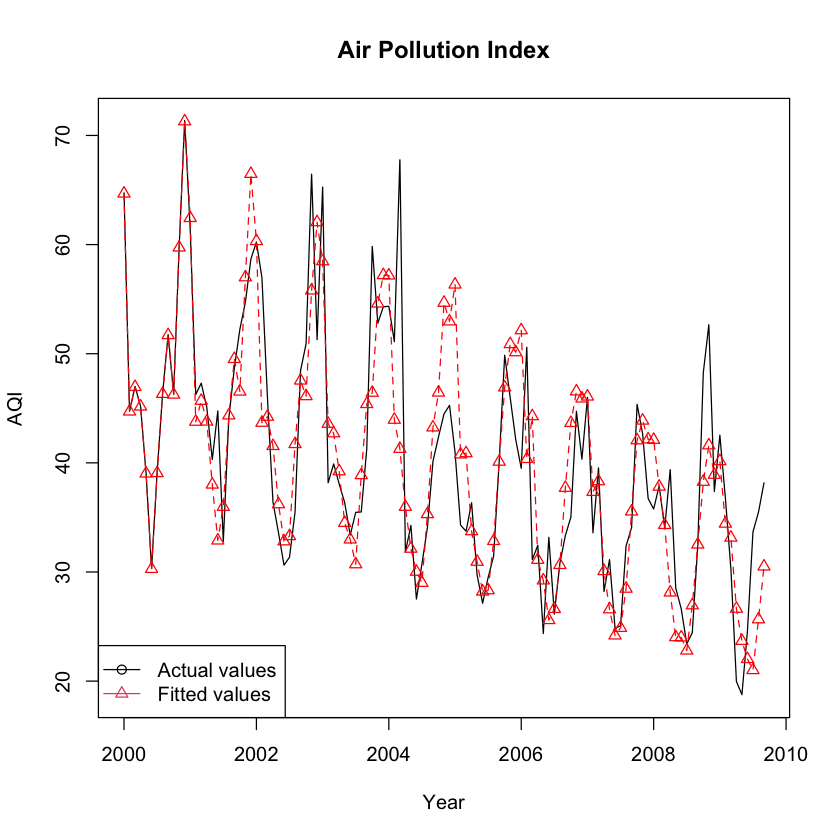

In [9]:
fit = ts(fitted.values(outf), start = 2000, frequency = 12)


#pdf('fit_0417.pdf',width=8,heigh t=4)
par(mfrow = c(1,1))
plot(datamts, ylim=c(min(datamts), max(fit)), xlab = 'Year', ylab = 'AQI', main = 'Air Pollution Index')
points(fit, col = 'red', pch = 2)
lines(fit, col = 'red', lty = 2)
legend.text=c("Actual values", "Fitted values")
legend("bottomleft", legend.text, lty = rep(1,2), col = 1:2, pch = 1:2)
#dev.off()

In [11]:
time.pred = time(datamts)[118:length(datamts)]
pp = predict(outf, 12)
pred = ts(pp$pred, start =2010 , frequency = 12)

ERROR: Error in predict.Arima(outf, 12): 'xreg' and 'newxreg' have different numbers of columns


In [12]:
pred.upp = ts(pp$pred+2*pp$se, start = 2010, frequency = 12)
pred.low = ts(pp$pred-2*pp$se, start = 2010, frequency = 12)

plot(datamts, type = 'o',xlim = c(2000,2011), xlab = 'Year', ylab = 'AQI', main = 'Air Pollution Index')
lines(pred, col = 'red')
points(pred, col = 'red', pch = 2)
lines(pred.low, col = 'red', lty = 2)
lines(pred.upp, col = 'red', lty = 2)
lines(datamts.new, col = 'blue', type = 'o')
legend.text=c("Past Values", "Prediction","Actual Values")
legend("bottomleft", legend.text, lty = rep(1,2,3), col = c(1,'red','blue'), pch = c(1,2,1))
#dev.off()

ERROR: Error in eval(expr, envir, enclos): object 'pp' not found
